In [1]:
import pandas as pd

#!pip install plotly
import plotly.express as px

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
#!pip install -U kaleido

pio.renderers.default = "svg"

In [2]:
ds_raw=pd.read_csv("Zomato_Mumbai_Dataset.csv",delimiter='|')

In [3]:
ds_raw.head()

,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",Mumbai,First International Financial Centre-- Bandra ...,https://www.zomato.com/mumbai/hitchki-bandra-k...,1,Casual Dining,12noon to 130am(Mon-Sun),Excellent,4.9,3529
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mumbai,Mahim,https://www.zomato.com/mumbai/baba-falooda-mah...,1,Dessert Parlor,2pm to 1am(Mon-Sun),Very Good,4.4,1723
2,Chin Chin Chu,1800,"Asian,Chinese",Mumbai,Juhu,https://www.zomato.com/mumbai/chin-chin-chu-ju...,1,Casual Dining,12noon to 1am(Mon-Sun),Very Good,4.2,337
3,Butterfly High,1000,Modern Indian,Mumbai,Bandra Kurla Complex,https://www.zomato.com/mumbai/butterfly-high-b...,1,Bar,12noon to 130am(Mon-Sun),Very Good,4.3,1200
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Mumbai,Bandra Kurla Complex,https://www.zomato.com/mumbai/bkc-dive-bandra-...,1,Bar,1130am to 1am(Mon-Sun),Veľmi dobré,4.4,5995


# Getting basic information aboout dataset...

In [4]:
ds_raw.shape

(15081, 12)

In [5]:
ds_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15081 entries, 0 to 15080
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   NAME             15081 non-null  object
 1   PRICE            15080 non-null  object
 2   CUSINE_CATEGORY  15079 non-null  object
 3   CITY             15080 non-null  object
 4   REGION           15080 non-null  object
 5   URL              15080 non-null  object
 6   PAGE NO          15080 non-null  object
 7   CUSINE TYPE      15080 non-null  object
 8   TIMING           15015 non-null  object
 9   RATING_TYPE      14070 non-null  object
 10  RATING           15080 non-null  object
 11  VOTES            15080 non-null  object
dtypes: object(12)
memory usage: 1.4+ MB


In [6]:
ds_raw.describe()

,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
count,15081,15080,15079,15080,15080,15080,15080,15080,15015,14070,15080,15080
unique,12720,67,3183,2,241,13823,944,23,2551,31,35,1124
top,NAME,400,CUSINE_CATEGORY,Mumbai,REGION,URL,PAGE NO,Quick Bites,11am to 11pm(Mon-Sun),Average,-,-
freq,942,2042,942,14138,942,942,942,5262,1192,5112,2360,2360


# Cleaning the dataset...

## 1. checking the redundant rows of data

In [7]:
dupe_data=ds_raw['PAGE NO']='PAGE NO'
ds_raw[dupe_data]

0        PAGE NO
1        PAGE NO
2        PAGE NO
3        PAGE NO
4        PAGE NO
          ...   
15076    PAGE NO
15077    PAGE NO
15078    PAGE NO
15079    PAGE NO
15080    PAGE NO
Name: PAGE NO, Length: 15081, dtype: object

In [8]:
dupe_data=ds_raw.duplicated()
ds_raw[dupe_data]

,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
31,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
47,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
63,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
79,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
95,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
...,...,...,...,...,...,...,...,...,...,...,...,...
15000,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
15016,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
15032,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
15048,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES


In [9]:
## Performing Negation of the dupe dataset and then storing the correct data back in the ds_raw DataFds_rawme
## This permamnently remove the dupe data from the original datafds_rawme

ds_raw=ds_raw[~dupe_data]
ds_raw

,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",Mumbai,First International Financial Centre-- Bandra ...,https://www.zomato.com/mumbai/hitchki-bandra-k...,PAGE NO,Casual Dining,12noon to 130am(Mon-Sun),Excellent,4.9,3529
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mumbai,Mahim,https://www.zomato.com/mumbai/baba-falooda-mah...,PAGE NO,Dessert Parlor,2pm to 1am(Mon-Sun),Very Good,4.4,1723
2,Chin Chin Chu,1800,"Asian,Chinese",Mumbai,Juhu,https://www.zomato.com/mumbai/chin-chin-chu-ju...,PAGE NO,Casual Dining,12noon to 1am(Mon-Sun),Very Good,4.2,337
3,Butterfly High,1000,Modern Indian,Mumbai,Bandra Kurla Complex,https://www.zomato.com/mumbai/butterfly-high-b...,PAGE NO,Bar,12noon to 130am(Mon-Sun),Very Good,4.3,1200
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Mumbai,Bandra Kurla Complex,https://www.zomato.com/mumbai/bkc-dive-bandra-...,PAGE NO,Bar,1130am to 1am(Mon-Sun),Veľmi dobré,4.4,5995
...,...,...,...,...,...,...,...,...,...,...,...,...
15076,Hari Om Snack Bar,350,"Fast Food,South Indian,Chinese",Mumbai,Kandivali West,https://www.zomato.com/mumbai/hari-om-snack-ba...,PAGE NO,Quick Bites,11am to 230am(Mon-Sun),Good,3.7,64
15077,PitaBurg,400,"Fast Food,Lebanese",Mumbai,Lower Parel,https://www.zomato.com/mumbai/pitaburg-lower-p...,PAGE NO,none,"11am to 11pm(Mon,Tue,Wed,Thu,Sun),11am to ...",Average,3.4,99
15078,Uncha Otlawala,300,"Desserts,Ice Cream",Mumbai,Kandivali West,https://www.zomato.com/mumbai/uncha-otlawala-1...,PAGE NO,Dessert Parlor,9am to 1230AM(Mon-Sun),Good,3.5,29
15079,Mandarin Panda,400,"Desserts,Chinese,Thai",Mumbai,Malad West,https://www.zomato.com/mumbai/mandarin-panda-m...,PAGE NO,none,"12noon to 330pm,7pm to 1am(Mon-Sun)",Good,3.7,121


## 2. Dropping the columns which are not required for further analysis...


In [10]:
ds_raw.drop(['URL','PAGE NO','CITY'],axis=1,inplace=True)

In [11]:
ds_raw.shape

(13829, 9)

In [12]:
ds_raw.head()

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",First International Financial Centre-- Bandra ...,Casual Dining,12noon to 130am(Mon-Sun),Excellent,4.9,3529
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mahim,Dessert Parlor,2pm to 1am(Mon-Sun),Very Good,4.4,1723
2,Chin Chin Chu,1800,"Asian,Chinese",Juhu,Casual Dining,12noon to 1am(Mon-Sun),Very Good,4.2,337
3,Butterfly High,1000,Modern Indian,Bandra Kurla Complex,Bar,12noon to 130am(Mon-Sun),Very Good,4.3,1200
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Bandra Kurla Complex,Bar,1130am to 1am(Mon-Sun),Veľmi dobré,4.4,5995


## 3. Removing the Null Records

In [13]:
# Checking for Null records...

ds_raw.isnull().sum()

NAME                 0
PRICE                1
CUSINE_CATEGORY      2
REGION               1
CUSINE TYPE          1
TIMING              66
RATING_TYPE        981
RATING               1
VOTES                1
dtype: int64

In [14]:
# Checking for a Null row...
ds_raw[ds_raw['PRICE'].isnull()]

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
15080,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Dropping the above row from the dataset
ds_raw.drop(labels=15080, axis=0)

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",First International Financial Centre-- Bandra ...,Casual Dining,12noon to 130am(Mon-Sun),Excellent,4.9,3529
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mahim,Dessert Parlor,2pm to 1am(Mon-Sun),Very Good,4.4,1723
2,Chin Chin Chu,1800,"Asian,Chinese",Juhu,Casual Dining,12noon to 1am(Mon-Sun),Very Good,4.2,337
3,Butterfly High,1000,Modern Indian,Bandra Kurla Complex,Bar,12noon to 130am(Mon-Sun),Very Good,4.3,1200
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Bandra Kurla Complex,Bar,1130am to 1am(Mon-Sun),Veľmi dobré,4.4,5995
...,...,...,...,...,...,...,...,...,...
15075,Tirupati Balaji,500,"Chinese,Fast Food,North Indian",Oshiwara-- Andheri West,Casual Dining,"8am to 11pm,12midnight to 115am(Mon-Sun)",Good,3.5,267
15076,Hari Om Snack Bar,350,"Fast Food,South Indian,Chinese",Kandivali West,Quick Bites,11am to 230am(Mon-Sun),Good,3.7,64
15077,PitaBurg,400,"Fast Food,Lebanese",Lower Parel,none,"11am to 11pm(Mon,Tue,Wed,Thu,Sun),11am to ...",Average,3.4,99
15078,Uncha Otlawala,300,"Desserts,Ice Cream",Kandivali West,Dessert Parlor,9am to 1230AM(Mon-Sun),Good,3.5,29


In [16]:
# Replacing the other Null values with 'NA'

ds_raw.fillna(value='NA',inplace=True)

In [17]:
# Confirming any Null values....

ds_raw.isnull().sum()

NAME               0
PRICE              0
CUSINE_CATEGORY    0
REGION             0
CUSINE TYPE        0
TIMING             0
RATING_TYPE        0
RATING             0
VOTES              0
dtype: int64

## Conversion of Data types...


In [18]:
ds_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13829 entries, 0 to 15080
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   NAME             13829 non-null  object
 1   PRICE            13829 non-null  object
 2   CUSINE_CATEGORY  13829 non-null  object
 3   REGION           13829 non-null  object
 4   CUSINE TYPE      13829 non-null  object
 5   TIMING           13829 non-null  object
 6   RATING_TYPE      13829 non-null  object
 7   RATING           13829 non-null  object
 8   VOTES            13829 non-null  object
dtypes: object(9)
memory usage: 1.6+ MB


In [19]:
ds_raw['PRICE'].value_counts()

PRICE
400     1993
500     1913
300     1884
200     1155
600     1041
        ... 
398        1
3500       1
1550       1
1650       1
NA         1
Name: count, Length: 68, dtype: int64

In [20]:
ds_raw['RATING'].value_counts()

RATING
-          2299
3.5        1064
3.4        1015
3.6         938
NEW         923
3.7         898
3.3         892
3.2         783
3.8         775
3.1         716
3.0         606
3.9         590
4.0         405
2.9         402
2.8         298
4.1         298
4.2         199
2.7         168
4.3         148
4.4          99
2.6          74
Opening      57
4.5          46
2.5          37
4.6          32
2.4          25
4.7          13
2.3          10
2.1           5
2.2           4
4.8           4
4.9           2
RATING        1
1.8           1
2.0           1
NA            1
Name: count, dtype: int64

In [21]:
# Replacing the text values in "ds_rawting" column with 0

ds_raw['RATING'].replace(to_replace=['-','NEW','Opening'],value=0,inplace=True)

/var/folders/1s/70xy4dvs6mn0zqfz6nvhbypw0000gn/T/ipykernel_4467/1592472550.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [22]:
ds_raw['RATING'].value_counts()

RATING
0         3279
3.5       1064
3.4       1015
3.6        938
3.7        898
3.3        892
3.2        783
3.8        775
3.1        716
3.0        606
3.9        590
4.0        405
2.9        402
4.1        298
2.8        298
4.2        199
2.7        168
4.3        148
4.4         99
2.6         74
4.5         46
2.5         37
4.6         32
2.4         25
4.7         13
2.3         10
2.1          5
2.2          4
4.8          4
4.9          2
RATING       1
1.8          1
2.0          1
NA           1
Name: count, dtype: int64

In [23]:
# Changing the datatype of the numerical column



In [24]:
# Checking the datatypes
ds_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13829 entries, 0 to 15080
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   NAME             13829 non-null  object
 1   PRICE            13829 non-null  object
 2   CUSINE_CATEGORY  13829 non-null  object
 3   REGION           13829 non-null  object
 4   CUSINE TYPE      13829 non-null  object
 5   TIMING           13829 non-null  object
 6   RATING_TYPE      13829 non-null  object
 7   RATING           13829 non-null  object
 8   VOTES            13829 non-null  object
dtypes: object(9)
memory usage: 1.6+ MB


In [25]:
# Chagnging the data types of numerical columns PRICE, ds_rawting, Votes



In [26]:
ds_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13829 entries, 0 to 15080
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   NAME             13829 non-null  object
 1   PRICE            13829 non-null  object
 2   CUSINE_CATEGORY  13829 non-null  object
 3   REGION           13829 non-null  object
 4   CUSINE TYPE      13829 non-null  object
 5   TIMING           13829 non-null  object
 6   RATING_TYPE      13829 non-null  object
 7   RATING           13829 non-null  object
 8   VOTES            13829 non-null  object
dtypes: object(9)
memory usage: 1.6+ MB


In [27]:
#ds_raw['PRICE'] = ds_raw['PRICE'].astype('int64')
#ds_raw['ds_rawTING'] = ds_raw['ds_rawTING'].astype('float64')
#ds_raw['VOTES'] = ds_raw['VOTES'].astype('int64')

ds_raw['PRICE'] = pd.to_numeric(ds_raw['PRICE'], errors='coerce')
ds_raw['PRICE'] = ds_raw['PRICE'].fillna(0)
ds_raw['PRICE'] = ds_raw['PRICE'].astype('int64')

ds_raw['RATING'] = pd.to_numeric(ds_raw['RATING'], errors='coerce')
ds_raw['RATING'] = ds_raw['RATING'].fillna(0)
ds_raw['RATING'] = ds_raw['RATING'].astype('float64')

ds_raw['VOTES'] = pd.to_numeric(ds_raw['VOTES'], errors='coerce')
ds_raw['VOTES'] = ds_raw['VOTES'].fillna(0)
ds_raw['VOTES'] = ds_raw['VOTES'].astype('int64')


In [28]:
ds_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13829 entries, 0 to 15080
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NAME             13829 non-null  object 
 1   PRICE            13829 non-null  int64  
 2   CUSINE_CATEGORY  13829 non-null  object 
 3   REGION           13829 non-null  object 
 4   CUSINE TYPE      13829 non-null  object 
 5   TIMING           13829 non-null  object 
 6   RATING_TYPE      13829 non-null  object 
 7   RATING           13829 non-null  float64
 8   VOTES            13829 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 1.6+ MB


In [29]:
## Working with Timing column
ds_raw["TIMING"].value_counts()

TIMING
11am to 11pm(Mon-Sun)                              1172
11am to 12midnight(Mon-Sun)                         616
12noon to 12midnight(Mon-Sun)                       458
11am to 1130pm(Mon-Sun)                             302
10am to 10pm(Mon-Sun)                               263
                                                   ... 
1130am to 1230AM(Mon-Tue),11am to 12midnight...       1
11am to 12midnight(Mon,Tue,Wed,Sun),11am to ...       1
1130am to 430pm,7pm to 130am(Mon-Sun)                 1
12midnight to 5am,12noon to 4pm,730pm to ...          1
8am to 11pm,12midnight to 115am(Mon-Sun)              1
Name: count, Length: 2552, dtype: int64

In [30]:
temp_df=ds_raw["TIMING"].str.split('(',n=1,expand=True)
temp_df

,0,1
0,12noon to 130am,Mon-Sun)
1,2pm to 1am,Mon-Sun)
2,12noon to 1am,Mon-Sun)
3,12noon to 130am,Mon-Sun)
4,1130am to 1am,Mon-Sun)
...,...,...
15076,11am to 230am,Mon-Sun)
15077,11am to 11pm,"Mon,Tue,Wed,Thu,Sun),11am to ..."
15078,9am to 1230AM,Mon-Sun)
15079,"12noon to 330pm,7pm to 1am",Mon-Sun)


In [31]:
ds_raw["Timing"]=temp_df[0]
ds_raw['Days_Open']=temp_df[1]
ds_raw.head()

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,Timing,Days_Open
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",First International Financial Centre-- Bandra ...,Casual Dining,12noon to 130am(Mon-Sun),Excellent,4.9,3529,12noon to 130am,Mon-Sun)
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mahim,Dessert Parlor,2pm to 1am(Mon-Sun),Very Good,4.4,1723,2pm to 1am,Mon-Sun)
2,Chin Chin Chu,1800,"Asian,Chinese",Juhu,Casual Dining,12noon to 1am(Mon-Sun),Very Good,4.2,337,12noon to 1am,Mon-Sun)
3,Butterfly High,1000,Modern Indian,Bandra Kurla Complex,Bar,12noon to 130am(Mon-Sun),Very Good,4.3,1200,12noon to 130am,Mon-Sun)
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Bandra Kurla Complex,Bar,1130am to 1am(Mon-Sun),Veľmi dobré,4.4,5995,1130am to 1am,Mon-Sun)


In [32]:
# Removing the Bds_rawcket chads_rawcter from the "Days-Open" column

ds_raw['Days_Open']=ds_raw['Days_Open'].str.replace(')','')

In [33]:
ds_raw.head()

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,Timing,Days_Open
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",First International Financial Centre-- Bandra ...,Casual Dining,12noon to 130am(Mon-Sun),Excellent,4.9,3529,12noon to 130am,Mon-Sun
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mahim,Dessert Parlor,2pm to 1am(Mon-Sun),Very Good,4.4,1723,2pm to 1am,Mon-Sun
2,Chin Chin Chu,1800,"Asian,Chinese",Juhu,Casual Dining,12noon to 1am(Mon-Sun),Very Good,4.2,337,12noon to 1am,Mon-Sun
3,Butterfly High,1000,Modern Indian,Bandra Kurla Complex,Bar,12noon to 130am(Mon-Sun),Very Good,4.3,1200,12noon to 130am,Mon-Sun
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Bandra Kurla Complex,Bar,1130am to 1am(Mon-Sun),Veľmi dobré,4.4,5995,1130am to 1am,Mon-Sun


In [34]:
# Checking for NULL records in Days_open column

ds_raw.isnull().sum()

NAME                 0
PRICE                0
CUSINE_CATEGORY      0
REGION               0
CUSINE TYPE          0
TIMING               0
RATING_TYPE          0
RATING               0
VOTES                0
Timing               0
Days_Open          160
dtype: int64

In [35]:
ds_raw["Days_Open"].fillna('Na',inplace=True)

/var/folders/1s/70xy4dvs6mn0zqfz6nvhbypw0000gn/T/ipykernel_4467/1561403744.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [36]:
ds_raw.isnull().sum()

NAME               0
PRICE              0
CUSINE_CATEGORY    0
REGION             0
CUSINE TYPE        0
TIMING             0
RATING_TYPE        0
RATING             0
VOTES              0
Timing             0
Days_Open          0
dtype: int64

In [37]:
ds_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13829 entries, 0 to 15080
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NAME             13829 non-null  object 
 1   PRICE            13829 non-null  int64  
 2   CUSINE_CATEGORY  13829 non-null  object 
 3   REGION           13829 non-null  object 
 4   CUSINE TYPE      13829 non-null  object 
 5   TIMING           13829 non-null  object 
 6   RATING_TYPE      13829 non-null  object 
 7   RATING           13829 non-null  float64
 8   VOTES            13829 non-null  int64  
 9   Timing           13829 non-null  object 
 10  Days_Open        13829 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 1.8+ MB


## Removing the restauds_rawnt records whose ds_rawting or Votes is 0

In [38]:
ds_raw.shape

(13829, 11)

In [39]:
# finding the restauds_rawnt records whose ds_rawting or Votes is 0
useless_records=(ds_raw['RATING']==0) | (ds_raw['VOTES']==0)
ds_raw[useless_records]

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,Timing,Days_Open
15,NAME,0,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,0.0,0,TIMING,Na
32,Hotel Annapoorna Refreshments,400,"Maharashtrian,Mughlai,Chinese",Ghansoli,Quick Bites,1030am to 1230AM(Mon-Sun),Not rated,0.0,0,1030am to 1230AM,Mon-Sun
34,Biryani 9,600,"Biryani,North Indian",Near Andheri East Station,none,11am to 3am(Mon-Sun),NA,0.0,0,11am to 3am,Mon-Sun
36,D Fusion Flavours,350,Chinese,Goregaon East,none,"12noon to 330pm,7pm to 3am(Mon-Sun)",NA,0.0,0,"12noon to 330pm,7pm to 3am",Mon-Sun
39,Nation Tadka,400,"North Indian,South Indian,Chinese,Fast Food",Worli,none,12noon to 1230AM(Mon-Sun),Not rated,0.0,0,12noon to 1230AM,Mon-Sun
...,...,...,...,...,...,...,...,...,...,...,...
14999,Khansama,0,Biryani,Lower Parel,none,12noon to 3am(Mon-Sun),NA,0.0,0,12noon to 3am,Mon-Sun
15010,Earth Cafe @ Waterfield,800,"Cafe,Healthy Food,Italian,Pizza,Beverages",Linking Road-- Bandra West,Café,"10am to 10pm(Mon-Thu),10am to 11pm(Fri-Sun)",NA,0.0,0,10am to 10pm,"Mon-Thu,10am to 11pm(Fri-Sun"
15023,How About Some Cream,200,Beverages,Mumbai Central,Beverage Shop,12noon to 3am(Mon-Sun),NA,0.0,0,12noon to 3am,Mon-Sun
15046,Food And Taste Theory,800,"Continental,Italian",Phoenix Marketcity-- Kurla,Casual Dining,"9am to 12midnight(Mon-Fri),9am to 1230AM(Sat-Sun)",NA,0.0,0,9am to 12midnight,"Mon-Fri,9am to 1230AM(Sat-Sun"


In [40]:
# removing the restauds_rawnt records whose ds_rawting or Votes is 0
## Performing Negation of the useless dataset and then storing the correct data back in the ds_raw DataFds_rawme
## This permamnently remove the wrong data from the original datafds_rawme

ds_raw=ds_raw[ ~useless_records]



## Working on 'RATING_TYPE' Column

In [41]:
# Checking the Unique value column
ds_raw['RATING_TYPE'].value_counts()

RATING_TYPE
Average          4979
Good             4246
Very Good        1134
Excellent          95
Poor               46
Veľmi dobré         6
Skvělá volba        4
Dobrze              4
Bardzo dobrze       3
Ortalama            2
Bueno               2
İyi                 2
Buono               2
Dobré               2
Bom                 2
Priemer             2
Průměr              2
Muito Bom           2
Promedio            2
Muy Bueno           1
Sangat Baik         1
Média               1
Biasa               1
Skvělé              1
Baik                1
Çok iyi             1
Excelente           1
Velmi dobré         1
Media               1
Name: count, dtype: int64

In [42]:
ds_raw['RATING_TYPE'].replace(to_replace='Excelente' , value='Excellent',inplace=True)
ds_raw['RATING_TYPE'].replace(to_replace=['Veľmi dobré','Bardzo dobrze','Muy Bueno','Velmi dobré'] , value='Very Good',inplace=True)
ds_raw['RATING_TYPE'].replace(to_replace=['Skvělá volba','Dobrze','Bueno','Buono','Dobré','Bom','Skvělé'] , value='Good',inplace=True)
ds_raw['RATING_TYPE'].replace(to_replace=['Priemer','Média','Çok iyi'] , value='Aveds_rawge',inplace=True)
ds_raw['RATING_TYPE'].replace(to_replace=['Průměr','Promedio','Ortalama','Muito Bom','İyi'] , value='Poor',inplace=True)
ds_raw['RATING_TYPE'].replace(to_replace=['Baik','Biasa','Media','Sangat Baik'] , value='Very Poor',inplace=True)

/var/folders/1s/70xy4dvs6mn0zqfz6nvhbypw0000gn/T/ipykernel_4467/2612647503.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/var/folders/1s/70xy4dvs6mn0zqfz6nvhbypw0000gn/T/ipykernel_4467/2612647503.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/1s/70xy4dvs6mn0zqfz6nvhbypw0000gn/T/ipykernel_4467/2612647503.py:2: FutureWarn

In [43]:
# Checking all the values correctly mapped
ds_raw['RATING_TYPE'].value_counts()

RATING_TYPE
Average        4979
Good           4263
Very Good      1145
Excellent        96
Poor             56
Aveds_rawge       4
Very Poor         4
Name: count, dtype: int64

## Working on 'REGION' Column

In [44]:
ds_raw['REGION'].value_counts()

REGION
Mira Road                            395
Malad West                           301
Chembur                              270
Kharghar                             263
Borivali West                        259
                                    ... 
Hotel Emerald-- Juhu                   1
Trident-- Bandra Kurla Complex         1
Sea Princess-- Juhu                    1
Aureole Hotel-- Andheri East           1
Hotel Satkar Residency-- Majiwada      1
Name: count, Length: 237, dtype: int64

In [45]:
# Removing the irrelevant text from the Region column
ds_raw['REGION'] = ds_raw['REGION'].str.replace('[a-zA-Z].+-- ','',regex=True)


/var/folders/1s/70xy4dvs6mn0zqfz6nvhbypw0000gn/T/ipykernel_4467/3552444876.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [46]:
ds_raw['REGION'].value_counts()

REGION
Thane West           701
Andheri West         403
Mira Road            402
Malad West           309
Bandra West          278
                    ... 
Andheri East           2
CBD Belapur            1
Girgaon Chowpatty      1
Goregaon               1
Dadar                  1
Name: count, Length: 120, dtype: int64

In [47]:
# Replacing Small regions with Known region name
ds_raw['REGION'] = ds_raw['REGION'].str.replace('4 Bungalows|7 Andheri|Azad Nagar|Near Andheri Station|Veera Desai Area','Andheri',regex=True)
ds_raw['REGION'] = ds_raw['REGION'].str.replace('Bandra Kurla Complex','Bandra',regex=True)
ds_raw['REGION'] = ds_raw['REGION'].str.replace('CBD-Belapur','CBD Belapur',regex=True)
ds_raw['REGION'] = ds_raw['REGION'].str.replace('Girgaon Chowpatty','Chowpatty',regex=True)
ds_raw['REGION'] = ds_raw['REGION'].str.replace('Dadar Shivaji Park','Dadar',regex=True)
ds_raw['REGION'] = ds_raw['REGION'].str.replace('Flea Bazaar Café|Kamala Mills Compound','Lower Parel',regex=True)
ds_raw['REGION'] = ds_raw['REGION'].str.replace('Runwal Green','Mulund',regex=True)
ds_raw['REGION'] = ds_raw['REGION'].str.replace('Mumbai CST Area','Mumbai Central',regex=True)
ds_raw['REGION'] = ds_raw['REGION'].str.replace('Kopar Khairane|Seawoods|Turbhe|Ulwe','Navi Mumbai',regex=True)
ds_raw['REGION'] = ds_raw['REGION'].str.replace('New Panvel|Old Panvel','Panvel',regex=True)
ds_raw['REGION'] = ds_raw['REGION'].str.replace('Kamothe','Sion',regex=True)
ds_raw['REGION'] = ds_raw['REGION'].str.replace('Ghodbunder Road|Majiwada','Thane',regex=True)

/var/folders/1s/70xy4dvs6mn0zqfz6nvhbypw0000gn/T/ipykernel_4467/402157147.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/1s/70xy4dvs6mn0zqfz6nvhbypw0000gn/T/ipykernel_4467/402157147.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/1s/70xy4dvs6mn0zqfz6nvhbypw0000gn/T/ipykernel_4467/402157147.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

## Removing Duplicate records

In [48]:
ds_raw[ds_raw.duplicated()]

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,Timing,Days_Open


## Copying the cleaned data into a new DataFrame

In [49]:
zomato_df=ds_raw.copy()

In [50]:
zomato_df.head()

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,Timing,Days_Open
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",Bandra,Casual Dining,12noon to 130am(Mon-Sun),Excellent,4.9,3529,12noon to 130am,Mon-Sun
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mahim,Dessert Parlor,2pm to 1am(Mon-Sun),Very Good,4.4,1723,2pm to 1am,Mon-Sun
2,Chin Chin Chu,1800,"Asian,Chinese",Juhu,Casual Dining,12noon to 1am(Mon-Sun),Very Good,4.2,337,12noon to 1am,Mon-Sun
3,Butterfly High,1000,Modern Indian,Bandra,Bar,12noon to 130am(Mon-Sun),Very Good,4.3,1200,12noon to 130am,Mon-Sun
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Bandra,Bar,1130am to 1am(Mon-Sun),Very Good,4.4,5995,1130am to 1am,Mon-Sun


# Performing Exploratory Data Analysis

## Q1) How many restaurants are in Mumbai for each type of cuisine

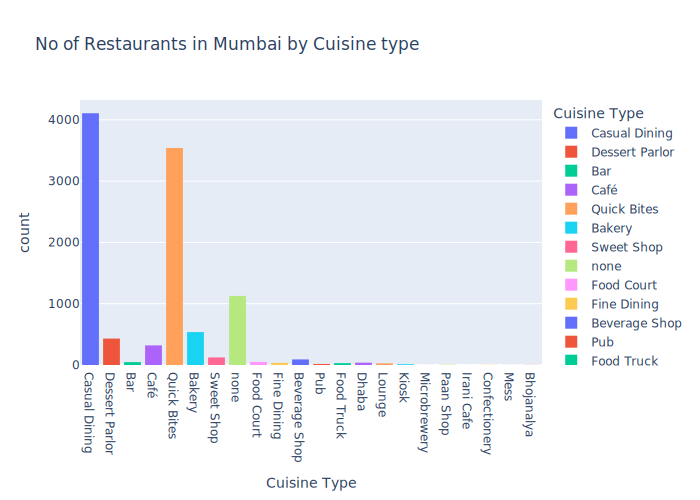

In [51]:
fig=px.histogram(data_frame=zomato_df,x="CUSINE TYPE",labels={'CUSINE TYPE':'Cuisine Type'},color='CUSINE TYPE',title="No of Restaurants in Mumbai by Cuisine type")
fig.show()

## Q2) What are the percentage of restaurants by Rating Type in Mumbai?

In [52]:
rating_type_df=zomato_df['RATING_TYPE'].value_counts().reset_index()
rating_type_df.rename(columns={'index':'RATING TYPE','count':'COUNT OF RESTAURANTS'},inplace=True)

rating_type_df

,RATING_TYPE,COUNT OF RESTAURANTS
0,Average,4979
1,Good,4263
2,Very Good,1145
3,Excellent,96
4,Poor,56
5,Aveds_rawge,4
6,Very Poor,4


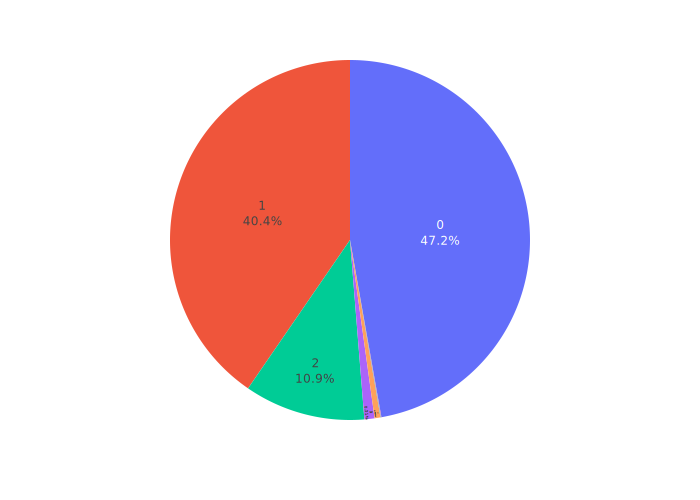

In [53]:
fig1=px.pie(data_frame=rating_type_df,values="COUNT OF RESTAURANTS",color="RATING_TYPE").update_traces(textposition='inside',textinfo='percent+label')
fig1.show()

## Q3) Which are the Top 10 highest rated Seafood Restaurant in Mumbai?

In [54]:
seafood_df=zomato_df[zomato_df["CUSINE_CATEGORY"].str.contains("Seafood")]
seafood_df

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,Timing,Days_Open
11,Raasta,1200,"Continental,Seafood,Fast Food,Desserts,Italian...",Khar,Casual Dining,12noon to 1am(Mon-Sun),Very Good,4.0,3191,12noon to 1am,Mon-Sun
18,Cafe Maaz,350,"Chinese,North Indian,Mughlai,Biryani,Seafood",Bhandup,Quick Bites,8am to 1230AM(Mon-Sun),Very Good,4.0,881,8am to 1230AM,Mon-Sun
24,Kasbah Grand,1400,"North Indian,Mughlai,Chinese,Thai,Seafood",Goregaon West,Casual Dining,"12noon to 130am(Mon-Fri),12noon to 3am(Sat-Sun)",Very Good,4.0,2280,12noon to 130am,"Mon-Fri,12noon to 3am(Sat-Sun"
76,Ceremonial Kitchen & Co,1000,"Seafood,Maharashtrian,North Indian,Chinese",Thane,Casual Dining,1130am to 1130pm(Mon-Sun),Excellent,4.6,350,1130am to 1130pm,Mon-Sun
85,Rajyog,800,"North Indian,Chinese,Seafood",Bandra East,Casual Dining,1130am to 1230AM(Mon-Sun),Good,3.6,83,1130am to 1230AM,Mon-Sun
...,...,...,...,...,...,...,...,...,...,...,...
15025,Mahesh Lunch Home & Bar,550,"North Indian,Chinese,Seafood,Mughlai",Kurla,Casual Dining,1130am to 1230AM(Mon-Sun),Good,3.7,80,1130am to 1230AM,Mon-Sun
15026,Suyog Dinning Bar,600,"Chinese,North Indian,Seafood,Fast Food",Dahisar East,Casual Dining,11am to 1am(Mon-Sun),Average,2.9,41,11am to 1am,Mon-Sun
15031,Shark Bite,400,"Seafood,Rolls,BBQ",Mumbai Central,Quick Bites,6pm to 2am(Mon-Sun),Average,3.4,22,6pm to 2am,Mon-Sun
15045,Soul Fry,1000,"Goan,Seafood",Bandra West,Casual Dining,"12noon to 3pm,7pm to 1am(Mon-Sun)",Good,3.8,531,"12noon to 3pm,7pm to 1am",Mon-Sun


In [55]:
# Top 10 highest rated Seafood Restaurant in Mumbai
seafood_df.sort_values(by='RATING',ascending=False).head(10)

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,Timing,Days_Open
7104,Thangabali,1000,"Seafood,South Indian,Mangalorean,Andhra,Kerala",Khar,Bar,"12noon to 4pm,7pm to 3am(Mon-Sun)",Excellent,4.7,564,"12noon to 4pm,7pm to 3am",Mon-Sun
76,Ceremonial Kitchen & Co,1000,"Seafood,Maharashtrian,North Indian,Chinese",Thane,Casual Dining,1130am to 1130pm(Mon-Sun),Excellent,4.6,350,1130am to 1130pm,Mon-Sun
13685,Maharashtra Lunch Home,600,"Maharashtrian,Malwani,Konkan,Seafood",Kharghar,Casual Dining,"11am to 345pm,7pm to 1145pm(Mon-Sun)",Excellent,4.6,209,"11am to 345pm,7pm to 1145pm",Mon-Sun
12433,Quarter Canteen,1100,"North Indian,Seafood,Chinese",Bandra West,Casual Dining,"12noon to 330pm,7pm to 1am(Mon-Sun)",Excellent,4.5,573,"12noon to 330pm,7pm to 1am",Mon-Sun
902,The Harbour Bay - SeaFood Kitchen & Bar,2400,"Seafood,Beverages",Bandra West,Casual Dining,12noon to 1am(Mon-Sun),Excellent,4.5,100,12noon to 1am,Mon-Sun
884,Rajmanya- Seafood family restaurant,800,"Maharashtrian,Konkan,Seafood",Vashi,Casual Dining,11am to 11pm(Mon-Sun),Excellent,4.5,178,11am to 11pm,Mon-Sun
3380,Peco Peco,700,"Chinese,Seafood,Asian",Powai,none,"12noon to 330pm,7pm to 1230AM(Mon-Sun)",Excellent,4.5,497,"12noon to 330pm,7pm to 1230AM",Mon-Sun
9954,Pi Bar and Kitchen,1600,"Continental,European,Italian,Seafood,Pizza,Des...",Andheri West,Bar,"12noon to 6pm,7pm to 12midnight(Mon-Sun)",Excellent,4.5,2068,"12noon to 6pm,7pm to 12midnight",Mon-Sun
903,Ferry Wharf,1500,"Seafood,Mangalorean",Bandra West,Casual Dining,"11am to 330pm,7pm to 1230AM(Mon-Sun)",Very Good,4.4,459,"11am to 330pm,7pm to 1230AM",Mon-Sun
915,Monis Bar and Restaurant,1000,"North Indian,Chinese,Continental,Seafood,Bever...",Thane West,Casual Dining,"1130am to 330pm,6pm to 1130pm(Mon-Sun)",Very Good,4.4,662,"1130am to 330pm,6pm to 1130pm",Mon-Sun


## Which is the best Food Truck in Mumbai?

In [56]:
# List the food Truck records in the "CUSINE TYPE" col
food_truck_df=zomato_df[zomato_df['CUSINE TYPE']=="Food Truck"]
food_truck_df

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,Timing,Days_Open
262,Dumpling Delights,200,Momos,Matunga East,Food Truck,430pm to 930pm(Mon-Sun),Very Good,4.3,212,430pm to 930pm,Mon-Sun
1017,Street Food Co.,250,"Fast Food,Chinese",Virar,Food Truck,6pm to 3am(Mon-Sun),Very Good,4.1,274,6pm to 3am,Mon-Sun
1381,Veggies Treat,200,"Italian,Mexican,North Indian",Kandivali West,Food Truck,"7pm to 1130pm(Mon),7pm to 11pm(Tue),730pm to ...",Average,3.4,17,7pm to 1130pm,"Mon,7pm to 11pm(Tue,730pm to ..."
1689,Punjab Da Chullah- Bar Bank,500,"Fast Food,North Indian",Juhu,Food Truck,12noon to 1am(Mon-Sun),Average,3.4,26,12noon to 1am,Mon-Sun
2461,Bombay Food Truck,500,Fast Food,Bandra,Food Truck,"1130am to 730pm(Mon-Fri),Closed(Sat-Sun)",Good,3.7,116,1130am to 730pm,"Mon-Fri,Closed(Sat-Sun"
2667,Pizza Al Passeggio-Pizza On The Go,200,Fast Food,Tardeo,Food Truck,"12noon to 12midnight(Mon-Sat),2pm to 12midnigh...",Good,3.5,17,12noon to 12midnight,"Mon-Sat,2pm to 12midnight..."
3639,Sobo Belly,400,"Mexican,Italian",Kandivali East,Food Truck,5pm to 1130pm(Mon-Sun),Good,3.7,26,5pm to 1130pm,Mon-Sun
4386,Cheese On Fire,300,"Fast Food,Italian",Ghatkopar East,Food Truck,"530pm to 1130pm(Mon-Fri),530pm to 1230AM...",Good,3.9,88,530pm to 1130pm,"Mon-Fri,530pm to 1230AM..."
5562,L' Dorado- Bar Bank,600,"American,Mexican",Juhu,Food Truck,12noon to 1am(Mon-Sun),Average,3.4,14,12noon to 1am,Mon-Sun
5568,Phat Fork- Bar Bank,600,"Chinese,Asian",Juhu,Food Truck,12noon to 1am(Mon-Sun),Average,3.4,19,12noon to 1am,Mon-Sun


In [57]:
# Which is the best Food Truck in Mumbai?
food_truck_df.sort_values(by="RATING",ascending=False).head(1)


,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,Timing,Days_Open
262,Dumpling Delights,200,Momos,Matunga East,Food Truck,430pm to 930pm(Mon-Sun),Very Good,4.3,212,430pm to 930pm,Mon-Sun


## Which places have the highest rated restaurant for each Cuisine Type in Mumbai?

In [58]:
highest_rated_df=zomato_df[zomato_df["RATING"]>=4.5]
highest_rated_df

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,Timing,Days_Open
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",Bandra,Casual Dining,12noon to 130am(Mon-Sun),Excellent,4.9,3529,12noon to 130am,Mon-Sun
6,Persian Darbar,1300,"Biryani,North Indian,Chinese,Mughlai",Marol,Casual Dining,10am to 3am(Mon-Sun),Excellent,4.5,3058,10am to 3am,Mon-Sun
7,Tanatan,1500,Modern Indian,Juhu,Casual Dining,12noon to 130am(Mon-Sun),Excellent,4.7,1842,12noon to 130am,Mon-Sun
9,Plum by Bent Chair,1800,Asian,Lower Parel,Casual Dining,12noon to 1am(Mon-Sun),Excellent,4.7,1876,12noon to 1am,Mon-Sun
10,Angrezi Dhaba,1500,"North Indian,Chinese,Thai,European",Dadar West,Bar,12noon to 1am(Mon-Sun),Excellent,4.5,2092,12noon to 1am,Mon-Sun
...,...,...,...,...,...,...,...,...,...,...,...
14228,Zaika Crave - Club Aquaria,1300,"North Indian,Continental,Chinese,Desserts",Borivali West,Casual Dining,"11am to 330pm,7pm to 1130pm(Mon,Tue,Wed...",Excellent,4.5,1302,"11am to 330pm,7pm to 1130pm","Mon,Tue,Wed..."
14234,Cone Culture,250,European,Kharghar,Casual Dining,"Closed(Mon),12noon to 11pm(Tue-Sun)",Excellent,4.6,492,Closed,"Mon,12noon to 11pm(Tue-Sun"
15007,Dessertino,300,"Desserts,Ice Cream",Kandivali West,Dessert Parlor,11am to 12midnight(Mon-Sun),Excellent,4.8,184,11am to 12midnight,Mon-Sun
15051,Tick-eat,800,"North Indian,Italian,Chinese,Mexican,Lebanese",Mulund West,Casual Dining,"1130am to 330pm,7pm to 1130pm(Mon-Sun)",Excellent,4.5,754,"1130am to 330pm,7pm to 1130pm",Mon-Sun


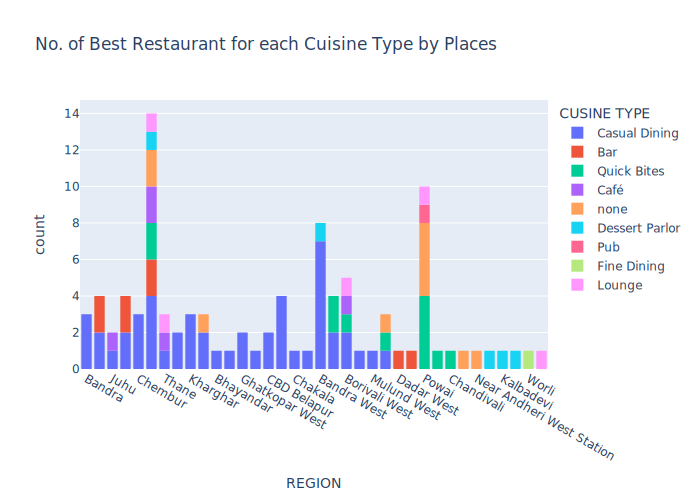

In [59]:
#px.histogram(highest_rated_df,color='CUSINE TYPE')
fig = px.histogram(highest_rated_df, x='REGION', color='CUSINE TYPE',title= 'No. of Best Restaurant for each Cuisine Type by Places')
fig.show()

## What is the Avg Price Distibution of highest rated restaurant for each Cuisine Type in Mumbai?

In [60]:
highest_rated_df.groupby(by=['REGION', 'CUSINE TYPE'])['PRICE'].mean().reset_index()
highest_rated_df.head()

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,Timing,Days_Open
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",Bandra,Casual Dining,12noon to 130am(Mon-Sun),Excellent,4.9,3529,12noon to 130am,Mon-Sun
6,Persian Darbar,1300,"Biryani,North Indian,Chinese,Mughlai",Marol,Casual Dining,10am to 3am(Mon-Sun),Excellent,4.5,3058,10am to 3am,Mon-Sun
7,Tanatan,1500,Modern Indian,Juhu,Casual Dining,12noon to 130am(Mon-Sun),Excellent,4.7,1842,12noon to 130am,Mon-Sun
9,Plum by Bent Chair,1800,Asian,Lower Parel,Casual Dining,12noon to 1am(Mon-Sun),Excellent,4.7,1876,12noon to 1am,Mon-Sun
10,Angrezi Dhaba,1500,"North Indian,Chinese,Thai,European",Dadar West,Bar,12noon to 1am(Mon-Sun),Excellent,4.5,2092,12noon to 1am,Mon-Sun


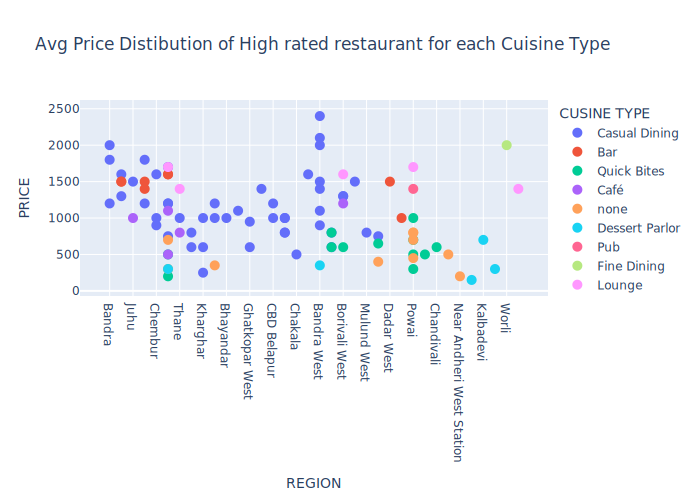

In [61]:
# Scatter plot
fig = px.scatter(highest_rated_df, x="REGION", y="PRICE", color="CUSINE TYPE", 
                 title=' Avg Price Distibution of High rated restaurant for each Cuisine Type').update_traces(marker_size=10)
fig.show()



## Which areas have a large number of Chinese Restaurant Market?

In [62]:
chinese_df=zomato_df[zomato_df["CUSINE_CATEGORY"].str.contains("Chinese")]
chinese_df

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,Timing,Days_Open
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",Bandra,Casual Dining,12noon to 130am(Mon-Sun),Excellent,4.9,3529,12noon to 130am,Mon-Sun
2,Chin Chin Chu,1800,"Asian,Chinese",Juhu,Casual Dining,12noon to 1am(Mon-Sun),Very Good,4.2,337,12noon to 1am,Mon-Sun
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Bandra,Bar,1130am to 1am(Mon-Sun),Very Good,4.4,5995,1130am to 1am,Mon-Sun
5,Flea Bazaar Café,800,"American,Asian,Street Food,North Indian,Luckno...",Lower Parel,Café,12noon to 1am(Mon-Sun),Very Good,4.2,2042,12noon to 1am,Mon-Sun
6,Persian Darbar,1300,"Biryani,North Indian,Chinese,Mughlai",Marol,Casual Dining,10am to 3am(Mon-Sun),Excellent,4.5,3058,10am to 3am,Mon-Sun
...,...,...,...,...,...,...,...,...,...,...,...
15071,Lucknow Zaika,500,"North Indian,Chinese",Kurla,Quick Bites,12noon to 2am(Mon-Sun),Average,2.6,36,12noon to 2am,Mon-Sun
15072,Zuha's Kitchen,400,"Chinese,North Indian,Mughlai",Mumbai Central,Quick Bites,"12noon to 4pm,730pm to 430am(Mon-Sun)",Average,3.3,13,"12noon to 4pm,730pm to 430am",Mon-Sun
15075,Tirupati Balaji,500,"Chinese,Fast Food,North Indian",Andheri West,Casual Dining,"8am to 11pm,12midnight to 115am(Mon-Sun)",Good,3.5,267,"8am to 11pm,12midnight to 115am",Mon-Sun
15076,Hari Om Snack Bar,350,"Fast Food,South Indian,Chinese",Kandivali West,Quick Bites,11am to 230am(Mon-Sun),Good,3.7,64,11am to 230am,Mon-Sun


In [63]:
chinese_rest_df=chinese_df.groupby(by="REGION").aggregate({'NAME':'count', 'PRICE':'mean'})
chinese_rest_df

,NAME,PRICE
REGION,,
Airoli,76,507.236842
Alibaug,3,750.000000
Ambernath,16,568.750000
Andheri,67,632.089552
Andheri West,161,657.142857
...,...,...
Vile Parle East,31,648.387097
Vile Parle West,22,602.272727
Virar,95,500.000000


In [64]:
chinese_rest_df=chinese_rest_df.rename(columns={"NAME":"count of restaurants"})
chinese_rest_df

,count of restaurants,PRICE
REGION,,
Airoli,76,507.236842
Alibaug,3,750.000000
Ambernath,16,568.750000
Andheri,67,632.089552
Andheri West,161,657.142857
...,...,...
Vile Parle East,31,648.387097
Vile Parle West,22,602.272727
Virar,95,500.000000


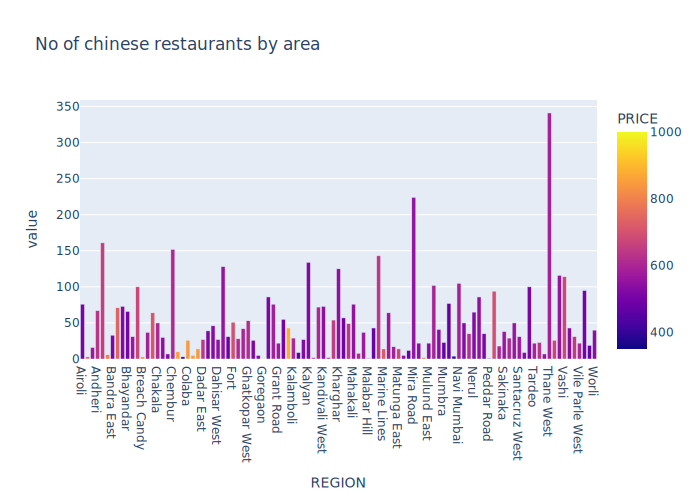

In [65]:
fig=px.bar(chinese_rest_df,color='PRICE',title="No of chinese restaurants by area")
fig.show()

## Is there a relation between Price and Rating by each Cuisine Type?

In [66]:
price_rating_df=zomato_df.groupby(['CUSINE TYPE','RATING'])['PRICE'].mean().reset_index()
price_rating_df

,CUSINE TYPE,RATING,PRICE
0,Bakery,2.7,400.000000
1,Bakery,2.8,285.714286
2,Bakery,2.9,328.571429
3,Bakery,3.0,300.000000
4,Bakery,3.1,369.117647
...,...,...,...
278,none,4.3,683.333333
279,none,4.4,555.000000
280,none,4.5,420.000000
281,none,4.6,687.500000


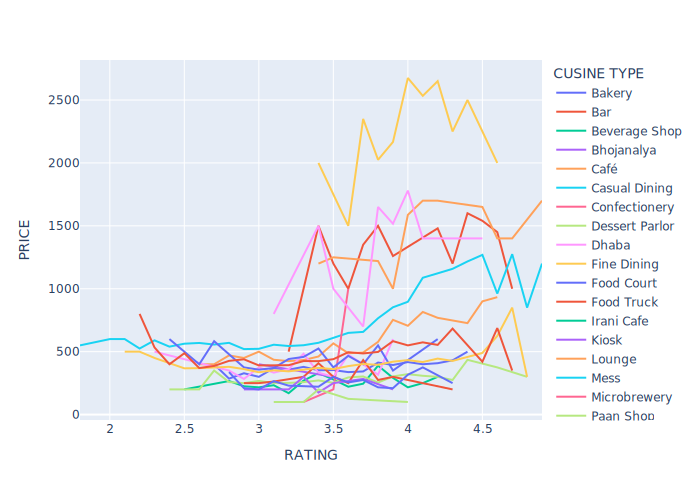

In [67]:
fig=px.line(price_rating_df, y="PRICE", x="RATING",color='CUSINE TYPE')
fig.show()

## Is there a relation between Region and Price?

In [68]:
region_price_df=zomato_df.groupby(["REGION"])["PRICE"].mean().reset_index()
region_price_df

,REGION,PRICE
0,Airoli,452.287582
1,Alibaug,665.000000
2,Ambernath,514.000000
3,Andheri,579.779412
4,Andheri East,1350.000000
...,...,...
99,Vile Parle East,487.368421
100,Vile Parle West,433.802817
101,Virar,452.027027
102,Wadala,427.500000


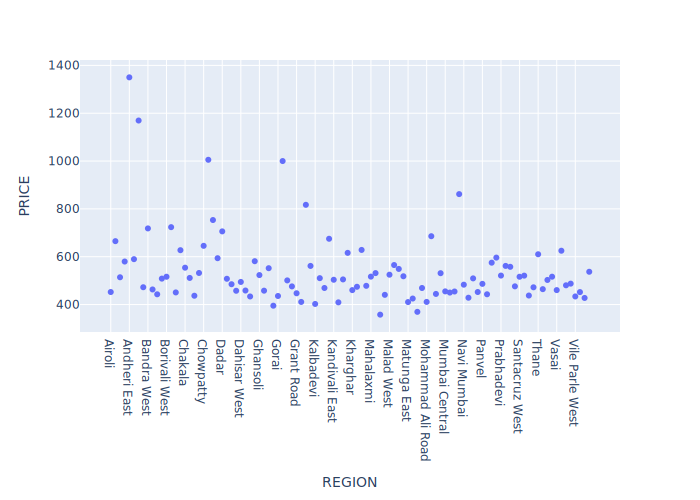

In [69]:
px.scatter(region_price_df,x="REGION",y="PRICE")

## Find the list of Affordable Restaurants?

In [70]:
#The criteria for Affordable Restaurants would be:-
#1) Low Price
#2) High Rated
#First step will be to find the restaurants with average cost 1/4th the average cost of most expensive restaurant in our dataframe.
#Let me explain:-The most expensive restaurant has an average meal cost= 6000. We'll try to stay economical and only pick the
#restaurants that are 1/4th of 6000.

In [71]:
max_price=zomato_df["PRICE"].max()
one_fourth_max_price=max_price/4
one_fourth_max_price

np.float64(1250.0)

In [72]:
# Affordable res...
aff_res_df=zomato_df[zomato_df['PRICE']<1250]
aff_res_df

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,Timing,Days_Open
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",Bandra,Casual Dining,12noon to 130am(Mon-Sun),Excellent,4.9,3529,12noon to 130am,Mon-Sun
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mahim,Dessert Parlor,2pm to 1am(Mon-Sun),Very Good,4.4,1723,2pm to 1am,Mon-Sun
3,Butterfly High,1000,Modern Indian,Bandra,Bar,12noon to 130am(Mon-Sun),Very Good,4.3,1200,12noon to 130am,Mon-Sun
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Bandra,Bar,1130am to 1am(Mon-Sun),Very Good,4.4,5995,1130am to 1am,Mon-Sun
5,Flea Bazaar Café,800,"American,Asian,Street Food,North Indian,Luckno...",Lower Parel,Café,12noon to 1am(Mon-Sun),Very Good,4.2,2042,12noon to 1am,Mon-Sun
...,...,...,...,...,...,...,...,...,...,...,...
15075,Tirupati Balaji,500,"Chinese,Fast Food,North Indian",Andheri West,Casual Dining,"8am to 11pm,12midnight to 115am(Mon-Sun)",Good,3.5,267,"8am to 11pm,12midnight to 115am",Mon-Sun
15076,Hari Om Snack Bar,350,"Fast Food,South Indian,Chinese",Kandivali West,Quick Bites,11am to 230am(Mon-Sun),Good,3.7,64,11am to 230am,Mon-Sun
15077,PitaBurg,400,"Fast Food,Lebanese",Lower Parel,none,"11am to 11pm(Mon,Tue,Wed,Thu,Sun),11am to ...",Average,3.4,99,11am to 11pm,"Mon,Tue,Wed,Thu,Sun,11am to ..."
15078,Uncha Otlawala,300,"Desserts,Ice Cream",Kandivali West,Dessert Parlor,9am to 1230AM(Mon-Sun),Good,3.5,29,9am to 1230AM,Mon-Sun


In [73]:
aff_res_df=aff_res_df.sort_values(by="PRICE")
aff_res_df

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,Timing,Days_Open
6137,Sanjog Wine N Dine,5,"North Indian,Chinese",Thane West,Casual Dining,11am to 12midnight(Mon-Sun),Good,3.5,36,11am to 12midnight,Mon-Sun
2925,Jab We Eat,50,"South Indian,North Indian,Maharashtrian,Fast Food",Girgaum,none,5am to 10pm(Mon-Sun),Average,3.3,8,5am to 10pm,Mon-Sun
9598,Ho5 Store,50,Fast Food,Matunga West,none,930am to 10pm(Mon-Sun),Average,3.2,8,930am to 10pm,Mon-Sun
9669,Himson Dryfruit & Sweets,100,"Fast Food,Mithai",Vile Parle West,Quick Bites,930am to 9pm(Mon-Sun),Average,2.9,5,930am to 9pm,Mon-Sun
3127,Tandoor Chai,100,"Fast Food,Beverages,Tea",Kalyan,Quick Bites,8am to 10pm(Mon-Sun),Average,3.4,13,8am to 10pm,Mon-Sun
...,...,...,...,...,...,...,...,...,...,...,...
1837,Chi Na Chi Ni,1200,Asian,Kharghar,Casual Dining,"Closed(Mon),12noon to 3pm,7pm to 11pm(Tue-Sun)",Very Good,4.3,514,Closed,"Mon,12noon to 3pm,7pm to 11pm(Tue-Sun"
14215,Reise All Day Bar & Kitchen,1200,"Burger,American,Italian,North Indian,European,...",Chakala,Casual Dining,"7am to 12midnight(Mon,Tue,Wed,Thu,Sun),7am...",Good,3.9,969,7am to 12midnight,"Mon,Tue,Wed,Thu,Sun,7am..."
14214,Wild Dining Restaurant,1200,"North Indian,Continental,Mexican,Chinese",Andheri West,Casual Dining,"12midnight to 1am,12noon to 330pm,7pm to ...",Excellent,4.5,1782,"12midnight to 1am,12noon to 330pm,7pm to ...",Na
7105,Bayview Cafe,1200,"North Indian,American,Chinese",Colaba,Casual Dining,"730am to 1230AM(Mon,Tue,Thu,Fri),7am to ...",Good,3.9,1315,730am to 1230AM,"Mon,Tue,Thu,Fri,7am to ..."


## Finding the highest rating of Restaurants...


In [74]:
# Highest rated res...
high_rated_res=zomato_df[zomato_df["RATING"]>=4.5]
high_rated_res=high_rated_res.sort_values(by="PRICE")
high_rated_res

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,Timing,Days_Open
1502,Cake Centre-The Dessert Maker,150,Desserts,Mohammad Ali Road,Dessert Parlor,11am to 12midnight(Mon-Sun),Excellent,4.6,105,11am to 12midnight,Mon-Sun
763,Curry And Combos Twist,200,"North Indian,Chinese",Andheri West,Quick Bites,930am to 1130pm(Mon-Sun),Excellent,4.5,39,930am to 1130pm,Mon-Sun
807,Moussestruck,200,Desserts,Near Andheri West Station,none,10am to 1145pm(Mon-Sun),Excellent,4.5,364,10am to 1145pm,Mon-Sun
14234,Cone Culture,250,European,Kharghar,Casual Dining,"Closed(Mon),12noon to 11pm(Tue-Sun)",Excellent,4.6,492,Closed,"Mon,12noon to 11pm(Tue-Sun"
725,Belo Pops,300,"Ice Cream,Desserts,Beverages",Andheri West,none,"7pm to 3am(Mon),1pm to 3am(Tue-Sun)",Excellent,4.5,752,7pm to 3am,"Mon,1pm to 3am(Tue-Sun"
...,...,...,...,...,...,...,...,...,...,...,...
5335,Mia Cucina,2000,Italian,Bandra West,Casual Dining,12noon to 1230AM(Mon-Sun),Excellent,4.5,229,12noon to 1230AM,Mon-Sun
1786,Global Fusion,2000,"Chinese,Japanese,Asian,North Indian",Worli,Fine Dining,"12noon to 330pm,7pm to 1230AM(Mon-Sun)",Excellent,4.6,240,"12noon to 330pm,7pm to 1230AM",Mon-Sun
8887,Drifters Tap Station,2000,"North Indian,Continental,European,American",Bandra,Casual Dining,12noon to 1am(Mon-Sun),Excellent,4.5,154,12noon to 1am,Mon-Sun
12625,House of Mandarin,2100,"Chinese,Sushi,Asian",Bandra West,Casual Dining,"12noon to 4pm,7pm to 12midnight(Mon-Sun)",Excellent,4.5,722,"12noon to 4pm,7pm to 12midnight",Mon-Sun


### Now, we'll merge the aff_rest_df with highrate_rest_df to obtain the intersection i.e the list of Affordable Restaurants !!

In [80]:
#high_aff_res=pd.merge(aff_res_df,high_rated_res,how='inner', on=['NAME', 'REGION'])
#high_aff_res=high_rated_res[['NAME', 'PRICE', 'CUSINE_CATEGORY', 'REGION', 'CUSINE TYPE']]
#high_aff_res.rename(columns={'NAME':'NAME', 'PRICE':'PRICE', 'CUSINE_CATEGORY':'CUSINE_CATEGORY',
#'REGION':'REGION', 'CUSINE TYPE':'CUSINE TYPE'},inplace=True)

high_aff_res = pd.merge(aff_res_df, high_rated_res, how='inner', on=['NAME', 'REGION'])
high_aff_res = high_aff_res[['NAME', 'PRICE_x', 'CUSINE_CATEGORY_x', 'REGION', 'CUSINE TYPE_x']]
high_aff_res.rename(columns={'NAME':'NAME', 'PRICE_x':'PRICE', 'CUSINE_CATEGORY_x':'CUSINE_CATEGORY',
'REGION':'REGION', 'CUSINE TYPE_x':'CUSINE TYPE'},inplace=True)


In [78]:
high_aff_res

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE
1502,Cake Centre-The Dessert Maker,150,Desserts,Mohammad Ali Road,Dessert Parlor
763,Curry And Combos Twist,200,"North Indian,Chinese",Andheri West,Quick Bites
807,Moussestruck,200,Desserts,Near Andheri West Station,none
14234,Cone Culture,250,European,Kharghar,Casual Dining
725,Belo Pops,300,"Ice Cream,Desserts,Beverages",Andheri West,none
...,...,...,...,...,...
5335,Mia Cucina,2000,Italian,Bandra West,Casual Dining
1786,Global Fusion,2000,"Chinese,Japanese,Asian,North Indian",Worli,Fine Dining
8887,Drifters Tap Station,2000,"North Indian,Continental,European,American",Bandra,Casual Dining
12625,House of Mandarin,2100,"Chinese,Sushi,Asian",Bandra West,Casual Dining


## Find the list of most Reliable Restaurants?The criteria for most Reliable Restaurants would be:-1) Low Price2) High Rated3) Large No. of VotesFirst step will be to find the restaurants with Votes greater than Mean of Votes

In [83]:
# step3:
mean_votes=zomato_df["VOTES"].mean()
mean_votes

np.float64(177.2656679624538)

In [88]:
# Res with votes > mean of votes
mean_rest_df=zomato_df[zomato_df["VOTES"]>177.26]
mean_rest_df.sort_values(by="VOTES")

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,Timing,Days_Open
4194,Sai Sagar Veg Treat,500,"North Indian,South Indian,Chinese,Fast Food,Be...",Kalyan,Casual Dining,10am to 1130pm(Mon-Sun),Good,3.5,178,10am to 1130pm,Mon-Sun
884,Rajmanya- Seafood family restaurant,800,"Maharashtrian,Konkan,Seafood",Vashi,Casual Dining,11am to 11pm(Mon-Sun),Excellent,4.5,178,11am to 11pm,Mon-Sun
3914,Ice Cafe,500,"Fast Food,Ice Cream,Beverages,Pizza",Borivali West,Quick Bites,"12midnight to 1am,3pm to 12midnight(Mon-Sun)",Very Good,4.3,178,"12midnight to 1am,3pm to 12midnight",Mon-Sun
7897,Konkan Lajjatdar,500,"Seafood,Biryani,Beverages,Chinese,Malwani,Konkan",Andheri West,Casual Dining,"1130am to 330pm,730pm to 12midnight(Mon-Sun)",Good,3.6,178,"1130am to 330pm,730pm to 12midnight",Mon-Sun
3828,Frozen Delight -The Dessert Cafe,250,"Desserts,Ice Cream",Airoli,Dessert Parlor,"Closed(Mon),11am to 12midnight(Tue-Sun)",Good,3.9,178,Closed,"Mon,11am to 12midnight(Tue-Sun"
...,...,...,...,...,...,...,...,...,...,...,...
8539,Leopold Cafe & Bar,1600,"American,Chinese,Mughlai,Italian",Colaba,Casual Dining,730am to 12midnight(Mon-Sun),Good,3.9,7327,730am to 12midnight,Mon-Sun
1251,Joey's Pizza,800,Pizza,Malad West,Quick Bites,11am to 12midnight(Mon-Sun),Excellent,4.6,7350,11am to 12midnight,Mon-Sun
5337,Chili's American Grill & Bar,1400,"American,Mexican,Burger,Tex-Mex",Powai,Casual Dining,12noon to 130am(Mon-Sun),Very Good,4.3,7377,12noon to 130am,Mon-Sun
3751,Prithvi Cafe,700,"Cafe,Fast Food",Juhu,Café,1030am to 1030pm(Mon-Sun),Very Good,4.4,8000,1030am to 1030pm,Mon-Sun


In [90]:
reliable_rest_df = pd.merge(mean_rest_df, high_aff_res, how='inner', on=['NAME', 'REGION'])
reliable_rest_df = reliable_rest_df[['NAME', 'PRICE_x', 'CUSINE_CATEGORY_x', 'REGION', 'CUSINE TYPE_x']]
reliable_rest_df.rename(columns={'NAME':'NAME', 'PRICE_x':'PRICE', 'CUSINE_CATEGORY_x':'CUSINE_CATEGORY',
'REGION':'REGION', 'CUSINE TYPE_x':'CUSINE TYPE'},inplace=True)
reliable_rest_df

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",Bandra,Casual Dining
1,Angrezi Patiyalaa,1200,"North Indian,Finger Food,American,Mexican,Chinese",Andheri West,Casual Dining
2,Spice Republic,1200,"Cafe,Continental,Mediterranean,Mexican,Italian...",Borivali West,Café
3,Little West Pizza,600,Pizza,Borivali West,Quick Bites
4,Ceremonial Kitchen & Co,1000,"Seafood,Maharashtrian,North Indian,Chinese",Thane,Casual Dining
5,Cafe Monza,1000,"Italian,American,Salad,Mexican",Kharghar,Casual Dining
6,Culinary Tales,1200,"Chinese,European,Continental,Salad,Italian,Pizza",Andheri,Casual Dining
7,Dum & Curry,700,"Mughlai,North Indian,Chinese",Powai,Quick Bites
8,Zaika Restaurant & Party Hall,1000,"North Indian,Chinese,Beverages",Bhayandar,Casual Dining
9,Invento,1200,"Chinese,Fast Food,North Indian,Italian,Mexican",Lower Parel,Casual Dining
